<a href="https://colab.research.google.com/github/auroravicks/Feynn-Labs/blob/main/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [157]:
df=pd.read_csv('/content/Bank Churn Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [159]:
df=df.drop('CustomerId',axis=1)
df=df.drop('Surname',axis=1)
df=df.drop('Geography',axis=1)
df=pd.get_dummies(df,columns=['Gender'])
df=df.drop('Gender_Male',axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1
3,699,39,1,0.00,2,0,0,93826.63,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,1


In [160]:
ch=df.Churn.tolist()
c1=ch.count(1)
c0=ch.count(0)
c1,c0

(2037, 7963)

In [180]:
from sklearn.model_selection import train_test_split

X=df.drop('Churn',axis=1)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X =pd.DataFrame(sc_x.fit_transform(X))
y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [182]:
from sklearn.svm import SVC
print('Support Vector Classification')

model = SVC(class_weight="balanced")
model.fit(X_train, y_train)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Support Vector Classification
Confusion Matrix : 
 [[602 192]
 [ 44 162]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       794
           1       0.46      0.79      0.58       206

    accuracy                           0.76      1000
   macro avg       0.69      0.77      0.71      1000
weighted avg       0.83      0.76      0.78      1000



In [183]:
#linear svm
print('Linear Support Vector Machine')
from sklearn.svm import SVC
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Linear Support Vector Machine
Confusion Matrix : 
 [[794   0]
 [206   0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      1.00      0.89       794
           1       0.00      0.00      0.00       206

    accuracy                           0.79      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.79      0.70      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
#svm non linear (radial basis function)
print('Non Linear Support Vector Machine-rbf')
from sklearn.svm import SVC
svnl = SVC(kernel='rbf')

svnl.fit(X_train, y_train)
y_pred=svnl.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Non Linear Support Vector Machine-rbf
Confusion Matrix : 
 [[778  16]
 [127  79]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       794
           1       0.83      0.38      0.52       206

    accuracy                           0.86      1000
   macro avg       0.85      0.68      0.72      1000
weighted avg       0.85      0.86      0.84      1000



In [185]:
#logistic regression
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
logr= LogisticRegression(random_state = 7)
logr.fit(X_train, y_train)
y_pred=logr.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Logistic Regression
Confusion Matrix : 
 [[768  26]
 [169  37]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       794
           1       0.59      0.18      0.28       206

    accuracy                           0.81      1000
   macro avg       0.70      0.57      0.58      1000
weighted avg       0.77      0.81      0.76      1000



In [186]:
#knn
print('Nearest Neighbours')
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=11)
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Nearest Neighbours
Confusion Matrix : 
 [[771  23]
 [135  71]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       794
           1       0.76      0.34      0.47       206

    accuracy                           0.84      1000
   macro avg       0.80      0.66      0.69      1000
weighted avg       0.83      0.84      0.82      1000



In [187]:
#decision tree
print('Decision Tree')
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Decision Tree
Confusion Matrix : 
 [[671 123]
 [100 106]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       794
           1       0.46      0.51      0.49       206

    accuracy                           0.78      1000
   macro avg       0.67      0.68      0.67      1000
weighted avg       0.79      0.78      0.78      1000



In [188]:
#random forest
print('Random Forest')
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(30)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Random Forest
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       794
           1       0.72      0.46      0.56       206

    accuracy                           0.85      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



In [189]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
print('XGBoost')
xgb_model = xgb.XGBClassifier(random_state=42,booster='gbtree',max_depth=2,subsample=0.7,min_child_weight=2,gamma=0.8,colsample_bylevel=0.8)
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))


XGBoost
Confusion Matrix : 
 [[757  37]
 [109  97]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       794
           1       0.72      0.47      0.57       206

    accuracy                           0.85      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



In [190]:
#basic neural network
print('Multi Layer Perceptron')
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(solver='sgd',alpha=0.5,hidden_layer_sizes=(256,32,128), random_state=1,max_iter=2000,learning_rate='adaptive')
nn.fit(X_train,y_train)
y_pred=nn.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Multi Layer Perceptron
Confusion Matrix : 
 [[762  32]
 [108  98]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       794
           1       0.75      0.48      0.58       206

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

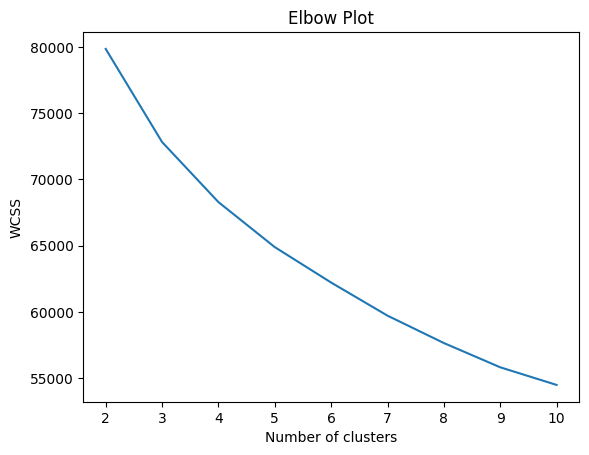

In [192]:
wcss=[]
for i in range(2,11):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(2,11)
plt.plot(number_clusters,wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

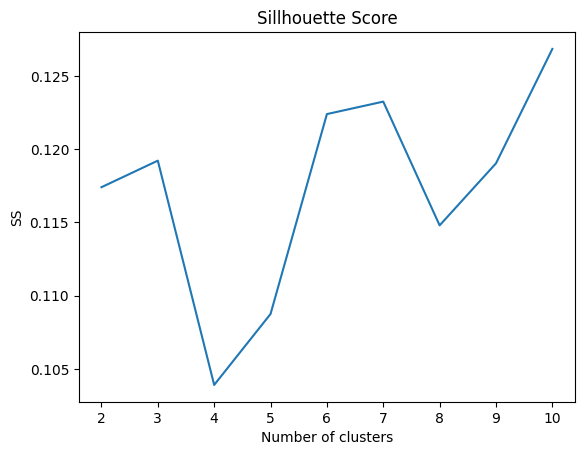

In [198]:
from sklearn.metrics import silhouette_score
ss=[]
for i in range(2,11):
  km = KMeans(i)
  km.fit_predict(X)
  score = silhouette_score(X, km.labels_, metric='euclidean')
  ss.append(score)
plt.plot(number_clusters,ss)
plt.title('Sillhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('SS')
plt.show

In [199]:
km=KMeans(6)
ypred=km.fit_predict(X)
df['Cluster']=ypred
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Gender_Female,Cluster
0,619,42,2,0.00,1,1,1,101348.88,1,1,2
1,608,41,1,83807.86,1,0,1,112542.58,0,1,5
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3
3,699,39,1,0.00,2,0,0,93826.63,0,1,3
4,850,43,2,125510.82,1,1,1,79084.10,0,1,2
